**Một Thuật toán để Nhận diện Động vật Hoang dã**
Trong sổ tay này, chúng ta sẽ làm việc với bộ dữ liệu Động vật Hoang dã Oregon được tạo ra bởi David Molina với một công cụ tìm kiếm của Google. Nó bao gồm khoảng 14.000 hình ảnh của 20 loài động vật hoang dã khác nhau như Nai, Puma, Sói xám và nhiều loài khác.

**Làm thế nào Mạng Nơ-ron tích chập hoạt động?**
Theo deep.ai: CNN xử lý hình ảnh như các khối thể, nhận một hình ảnh màu như một hộp chữ nhật trong đó chiều rộng và chiều cao được đo bằng số pixel liên quan đến mỗi chiều, và độ sâu là ba lớp cho mỗi màu sắc (RGB). Những lớp này được gọi là kênh. Trong mỗi pixel của hình ảnh, cường độ của R, G hoặc B được biểu diễn bằng một con số. Con số đó là một phần của ba ma trận hai chiều được xếp chồng lên nhau tạo thành thể tích hình ảnh và tạo thành dữ liệu ban đầu được đưa vào mạng tích chập. Mạng sau đó bắt đầu lọc hình ảnh bằng cách nhóm các hình vuông pixel lại và tìm kiếm các mẫu, thực hiện điều gọi là phép tích chập. Quá trình phân tích mẫu này là nền tảng của chức năng của CNN.


### Libraries
- numpy (Linear Algebra)
- pandas (Data Manipulation and Analysis)
- glob (File Manipulation)
- os (File Manipulation)
- regex (text patterns)
- random (sampling data)
- PIL (image processing)
- Sklearn (Evaluation Metrics)
- Pytorch (Deep Learning)


**Hướng Dẫn Tiếp Theo**
Chúng ta chia sổ tay thành các bước riêng biệt. Hãy sử dụng các liên kết dưới đây để dễ dàng di chuyển trong sổ tay.

Bước 1: Nhập Thư viện và Tải Bộ dữ liệu
Bước 2: Tạo Mạng Nơ-ron Tích chập để Phân loại Động vật Hoang dã (Từ Đầu)
Bước 3: Tạo Mạng Nơ-ron Tích chập để Phân loại Động vật Hoang dã (Sử dụng Học Chuyển giao)
Bước 4: Kiểm thử mô hình và Tạo một Thuật toán

<a id='step1'></a>
## Step 1: Nhập dữ liệu và thư viện


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
! mkdir ~/.kaggle

In [32]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [33]:
! chmod 600 ~/.kaggle/kaggle.json

In [35]:
! kaggle datasets download -d virtualdvid/oregon-wildlife

100% 4.54G/4.55G [00:58<00:00, 96.2MB/s]
100% 4.55G/4.55G [00:58<00:00, 83.8MB/s]


In [36]:
!unzip oregon-wildlife.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: oregon_wildlife/oregon_wildlife/nutria/dca571b2d2006b462f.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/dd0f64790789904451.jpeg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/de0554167716bbd246.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/de1422a88cf33075c7.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/de15ced87a2f98ebdc.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/de27e7a3e2247e2c97.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/df045e9514e7e77ee4.JPG  
  inflating: oregon_wildlife/oregon_wildlife/nutria/df3d4afbde1e4096ab.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/dfe010f959fbbf6a97.jpeg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/dffcec7d34c26f24cb.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/dffd8ba6bc1085d036.jpg  
  inflating: oregon_wildlife/oregon_wildlife/nutria/e0142c5c709b04a093.jpg  
  inflating: oreg

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import os
import re
import random
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
from skimage import io
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
from torch.utils.data import (Dataset, DataLoader)  # Gives easier dataset managment and creates mini batches
from torchvision.datasets import ImageFolder
import torchvision.models as models

## Trực Quan Hóa Dữ Liệu
Đầu tiên, hãy xem xét các tệp dữ liệu.

Các loài động vật là gì?
Chúng ta có bao nhiêu hình ảnh từ mỗi loài động vật?
Việc này giúp chúng ta hiểu rõ hơn về bộ dữ liệu mà chúng ta đang làm việc. Để làm điều này, bạn có thể sử dụng các thư viện hỗ trợ trong Python như Matplotlib hoặc Seaborn để vẽ biểu đồ hoặc hiển thị thông tin thống kê. Đối với mỗi loài động vật, chúng ta có thể đếm số lượng hình ảnh tương ứng.



In [39]:
animals_list = os.listdir("/content/oregon_wildlife/oregon_wildlife")
animals_file_list = []

for i in range(len(animals_list)):

  animals_file_list.append(os.listdir(str("/content/oregon_wildlife/oregon_wildlife/" + animals_list[i])))
  n = len(animals_file_list[i])
  print('There are', n , animals_list[i] , 'images.')

There are 735 columbian_black-tailed_deer images.
There are 718 black_bear images.
There are 656 raven images.
There are 668 gray_fox images.
There are 748 bald_eagle images.
There are 698 seals images.
There are 680 cougar images.
There are 577 mountain_beaver images.
There are 701 nutria images.
There are 588 ringtail images.
There are 717 canada_lynx images.
There are 728 raccoon images.
There are 660 elk images.
There are 730 gray_wolf images.
There are 764 deer images.
There are 728 virginia_opossum images.
There are 759 red_fox images.
There are 726 sea_lions images.
There are 696 bobcat images.
There are 736 coyote images.


Apparently we have a balanced dataset,  which means we have a similar 9but not equal) proportion of images of animals from each species.
To have a more real notion let's visualize the animals.






In [40]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5

for i in range(1, len(animals_list)+1):
    img = mpimg.imread(str("/content/oregon_wildlife/oregon_wildlife/"+ animals_list[i-1] + "/"+ animals_file_list[i-1][10]))
    compose = transforms.Compose([transforms.ToPILImage(),transforms.Resize((256,256))])
    img = compose(img)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(animals_list[i-1])
    plt.imshow(img)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Very beautiful animals right?

## Load Data

Now we will make use of Pytorch elements `transform`, `ImageFolder`, `DataLoader` to load the data.

The next steps will be the following.

1. Create a dataframe with the name of each file, the animal and the absolute path.
2. Select files that will further be in the train, test and validation sets.
3. Perform transformation in the data such as reshaping, croping and rotation that will allow the images that are from different sizes to be analyzed together.
4. Load the datasets using the DataLoader function, that will transform the images in tensors that will be analysed by the CNN.

In [44]:
dir = '/content/oregon_wildlife/oregon_wildlife'
files = [f for f in glob(dir + "**/**", recursive=True)] # create a list will allabsolute path of all files

In [45]:
df_animals = pd.DataFrame({"file_path":files}) # transform in a dataframe
df_animals['animal'] = df_animals['file_path'].str.extract('/oregon_wildlife/(.+)/') # extract the name of the animal
df_animals['file'] = df_animals['file_path'].str.extract('oregon_wildlife/.+/(.+)') # extrat the file name
df_animals = df_animals.dropna() # drop nas

Now we split the data in train, test and validation (inside the dataframe).

In [46]:
animal_set = set(df_animals['animal'])
train_val_test_list = [0,1,2]
train_val_weights = [70,15,15]
df_animals['train_val_test'] = 'NA'

for an in animal_set:
  n = sum(df_animals['animal'] == an) # count the number of animals
  train_val_test = random.choices(train_val_test_list, weights= train_val_weights,  k=n)
  df_animals.loc[df_animals['animal'] == an, 'train_val_test'] = train_val_test

Now we will create the dictonary `transform`. it will be used to transform the train, test and validation datasets.
We will apply different transformations on the train and test/validation datasets. Data augmentation is used in the trainning dataset to avoid overfitting, that means to avoid the a very good performance on the trainning set but a bed performane on the validation and testing datasets (bed generalization). The methods used were:
- Flipping the images horizontally
- Random Cropping: Extract randomly a 224 × 224 pixels section from 256 × 256 pixels
- RandomRotation: Randomly rotate the image by 10 degrees.


In [47]:
transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}


We create an auxiliary function to make sure the data is correctly splited among train, test and validation.   

In [48]:
def check_train(path):
    return (df_animals[df_animals['file_path'] == path].train_val_test == 0).bool

def check_valid(path):
    return (df_animals[df_animals['file_path'] == path].train_val_test == 1).bool

def check_test(path):
    return (df_animals[df_animals['file_path'] == path].train_val_test == 2).bool

#### Load the dataset

In [49]:
# Reading Dataset
image_datasets = {
    'train' : ImageFolder(root= dir, transform=transform['train'], is_valid_file=check_train),
    'valid' : ImageFolder(root=dir, transform=transform['valid'], is_valid_file=check_valid),
    'test' : ImageFolder(root=dir, transform=transform['test'], is_valid_file=check_test)
}

In [50]:
num_workers = 0
batch_size = 20

loaders_scratch = {
    'train' : DataLoader(image_datasets['train'], shuffle = True, batch_size = batch_size),
    'valid' : DataLoader(image_datasets['valid'], shuffle = True, batch_size = batch_size),
    'test' : DataLoader(image_datasets['test'], shuffle = True, batch_size = batch_size)
}

#### USE GPU

In [51]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

<a id='step2'></a>
## Step 2: Create a CNN to Classify Wild Animals (from Scratch)

We create a CNN that reveives tensors of `224 x 224 x 3` dimensions (that's how we prepared the dataset).

Some of the elements of our network built from scratch.
- Five convolutional layers. The last will return a tensor of `128 x 256, x 3` dimensions. Padding equals 1.
- A relu function applied after every convolutional iteration.
- A pooling function applied after every convolutional iteration.
- Two dropout layers to avoid overffiting.
- Two fully connected layers.  




 that will transform `128 x 256 x 3`
- relu


In [52]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 224 x 224 x 3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 122 x 122 x 16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56 x 56 x 32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 28 x 28 x 64 tensor)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer (sees 14 x 14 x 128 tensor)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)

        # linear layer (64 * 4 * 4 -> 133)
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        # linear layer (133 -> 133)
        self.fc2 = nn.Linear(512, 20)


    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.conv_bn2(self.pool(F.relu(self.conv1(x))))
        x = self.conv_bn3(self.pool(F.relu(self.conv2(x))))
        x = self.conv_bn4(self.pool(F.relu(self.conv3(x))))
        x = self.conv_bn5(self.pool(F.relu(self.conv4(x))))
        x = self.conv_bn6(self.pool(F.relu(self.conv5(x))))
        # flatten image input
        x = x.view(-1, 256 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (conv_bn1): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6

We define an optmizer and a loss function.

- **loss function**: Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. From the [ml-cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

- **optimizer**: Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate. From [wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

In [53]:

# specify loss function
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

In [54]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):

    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf

    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + (1 / (batch_idx + 1)) * (loss.data - train_loss)


        ######################
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)


        # print training/validation statistics
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))

        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss

    # return trained model
    return model

# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch: 1 	Training Loss: 2.588487 	Validation Loss: 2.059921
Validation loss decreased (inf --> 2.059921).  Saving model ...
Epoch: 2 	Training Loss: 2.344411 	Validation Loss: 1.870780
Validation loss decreased (2.059921 --> 1.870780).  Saving model ...
Epoch: 3 	Training Loss: 2.209568 	Validation Loss: 1.630836
Validation loss decreased (1.870780 --> 1.630836).  Saving model ...
Epoch: 4 	Training Loss: 2.099275 	Validation Loss: 1.586040
Validation loss decreased (1.630836 --> 1.586040).  Saving model ...
Epoch: 5 	Training Loss: 2.024416 	Validation Loss: 1.413509
Validation loss decreased (1.586040 --> 1.413509).  Saving model ...
Epoch: 6 	Training Loss: 1.968220 	Validation Loss: 1.375352
Validation loss decreased (1.413509 --> 1.375352).  Saving model ...
Epoch: 7 	Training Loss: 1.905828 	Validation Loss: 1.348252
Validation loss decreased (1.375352 --> 1.348252).  Saving model ...
Epoch: 8 	Training Loss: 1.840371 	Validation Loss: 1.183780
Validation loss decreased (1.34825

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [55]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    if torch.cuda.is_available():
      model.cuda()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 1.035257


Test Accuracy: 68% (9536/14013)


<a id='step3'></a>
## Step 3: Create a CNN to Classify Wild Animals (using Transfer Learning)

We will now use transfer learning to create a CNN that can identify the animals from the images.

From [neurohive](https://neurohive.io/en/popular-networks/vgg16/):
*VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.*










In [56]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

In [57]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer


# if GPU is available, move the model to GPU
if use_cuda:
    model_transfer.cuda()
print(model_transfer)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 68.0MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [58]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

Predicted Animal: canada lynx 
 True Animal: canada_lynx


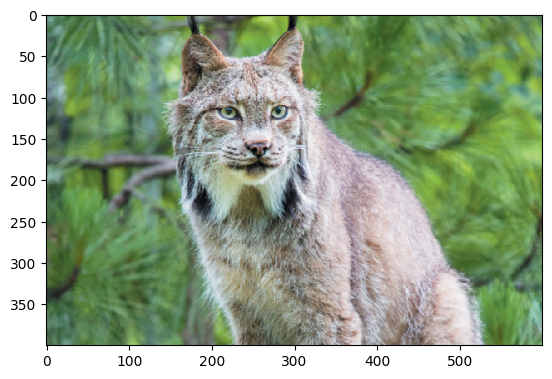

Predicted Animal: sea lions 
 True Animal: sea_lions


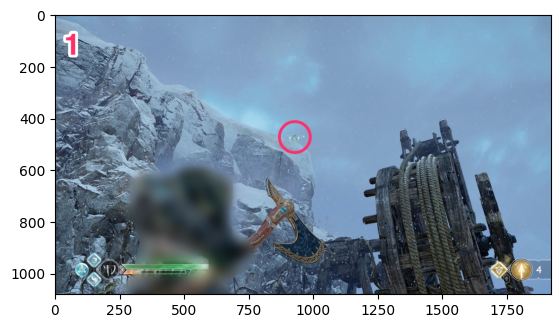

Predicted Animal: canada lynx 
 True Animal: canada_lynx


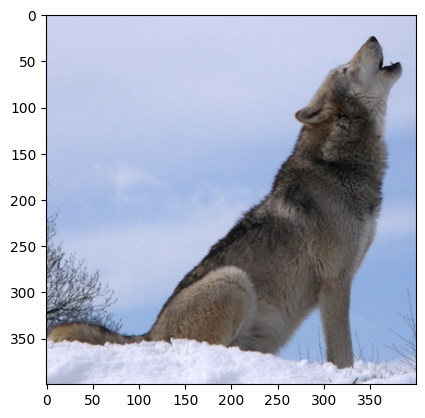

Predicted Animal: bald eagle 
 True Animal: bald_eagle


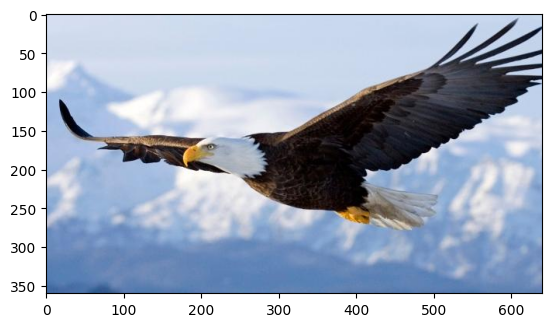

Predicted Animal: gray fox 
 True Animal: gray_fox


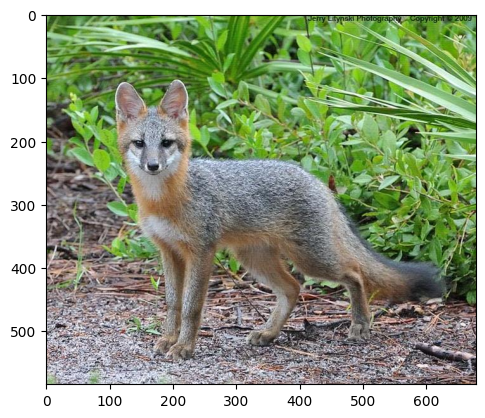

In [66]:
### TODO: Write a function that takes a path to an image as input
### and returns the animal that is predicted by the model.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.autograd import Variable
import random
import re

# create a list with a class names
class_names = image_datasets['train'].classes
class_names = [re.sub("\d{3}.", "", item) for item in class_names]
class_names = [re.sub("_", " ", item) for item in class_names]

def predict_breed_scratch(img_path):

    # load the image and return the predicted breed
    img = Image.open(img_path) # Load the image from provided path

    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize]
    )

    img_tensor = preprocess(img).float()
    img_tensor.unsqueeze_(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img_tensor = Variable(img_tensor) #The input to the network needs to be an autograd Variable

    if use_cuda:
        img_tensor = Variable(img_tensor.cuda())

    model_scratch.eval()
    output = model_scratch(img_tensor) # Returns a Tensor of shape (batch, num class labels)
    output = output.cpu()

    # Our prediction will be the index of the class label with the largest value.
    predict_index = output.data.numpy().argmax()

    predicted_breed = class_names[predict_index]
    true_breed = image_datasets['train'].classes[predict_index]

    return (predicted_breed, true_breed)

# Create list of test image paths
test_img_paths = list(df_animals[df_animals.train_val_test == 2].file_path)
np.random.shuffle(test_img_paths)

for img_path in test_img_paths[0:5]:
    predicted_breed, true_breed = predict_breed_scratch(img_path)
    print("Predicted Animal:" , predicted_breed, "\n", "True Animal:" , true_breed)
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()


Predicted Animal: elk 
 True Animal: elk


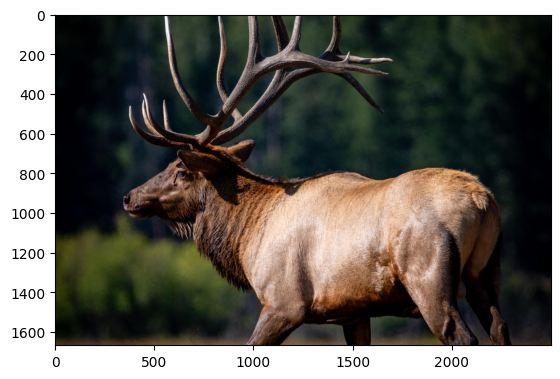

In [74]:
predicted_breed, true_breed = predict_breed_scratch('/content/drive/MyDrive/Ảnh/220323-elk-death-good-bull-outdoors-ac-838p-ed8175.jpg')
print("Predicted Animal:" , predicted_breed, "\n", "True Animal:" , true_breed)
img=mpimg.imread('/content/drive/MyDrive/Ảnh/220323-elk-death-good-bull-outdoors-ac-838p-ed8175.jpg')
imgplot = plt.imshow(img)
plt.show()